# AWS
Let's read satellite data stored on AWS.

This tutorial is a bit tricky as EOReader uses `rasterio` and `cloudpathlib` libraries and they are currently handling S3 buckets differently.
That's why we'll use the helper context manager `temp_s3` from `sertit.s3`, that will do the right connections for us.

<div class="alert alert-info">
  
   <strong>Note:</strong> These Sentinel-2 products are not stored in the `.SAFE` format. Landsat format is however the same.
    
</div>

You can open windows like for any other products.


## Cloud data processed by Element84: Sentinel-2 L2A as COGs

See this [registry](https://registry.opendata.aws/sentinel-2-l2a-cogs) (`arn:aws:s3:::sentinel-cogs`).
This registry is open access, so you don't have to sign-in. 

In [1]:

# Imports
import os
import tempenv
import logging

from rasterio.windows import Window
from sertit import logs, s3
from eoreader.reader import Reader, Constellation
from eoreader.bands import BLUE

2025-12-23 11:05:02,230 - [DEBUG] - Loading bands ['BLUE']
2025-12-23 11:05:02,409 - [DEBUG] - Read BLUE
2025-12-23 11:05:03,321 - [DEBUG] - Manage nodata for band BLUE
2025-12-23 11:05:03,322 - [DEBUG] - Converting BLUE to reflectance (if needed)
2025-12-23 11:05:03,323 - [DEBUG] - Clip the reflectance array to 0 as minimum value (in some cases, reflectance can have higher value than 1)


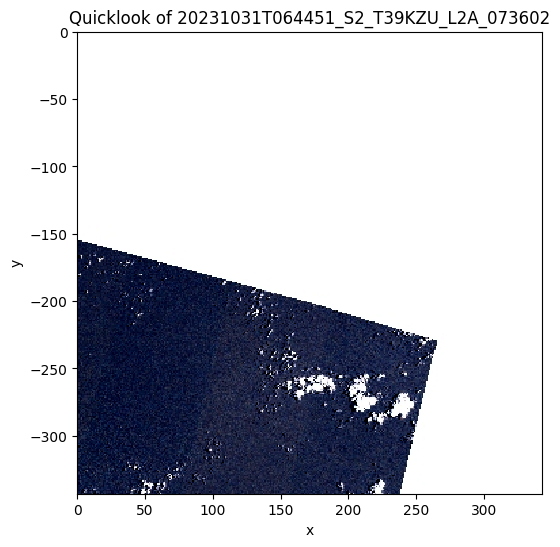

In [6]:
with tempenv.TemporaryEnvironment({
    "AWS_S3_ENDPOINT": "s3.us-west-2.amazonaws.com",
}):
    with s3.temp_s3(no_sign_request=True):
        logs.init_logger(logging.getLogger("eoreader"), logging.DEBUG)
        path = r"s3://sentinel-cogs/sentinel-s2-l2a-cogs/39/K/ZU/2023/10/S2A_39KZU_20231031_0_L2A"
        prod = Reader().open(path)
        prod.plot()
        blue = prod.load(BLUE, window=Window(0, 8000, 2000, 10000))[BLUE]

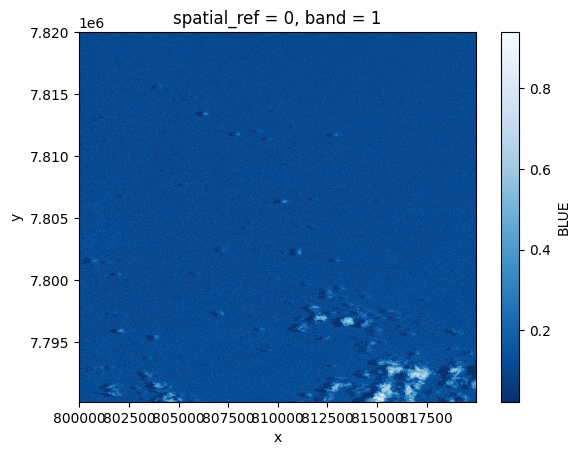

In [7]:
blue[:, ::2, ::2].plot(cmap="Blues_r")

## Cloud data processed by Sinergise: Sentinel-2 L1C

See this [registry](https://registry.opendata.aws/sentinel-2/) (`arn:aws:s3:::sentinel-s2-l1c`).
This registry needs authentication.

NB: L2A would have been the same (`arn:aws:s3:::sentinel-s2-l2a`)

<div class="alert alert-info">
  
   <strong>Note:</strong> Sinergise data are stored as requester pays in AWS. Don't forget to state this when requesting data!
    
</div>

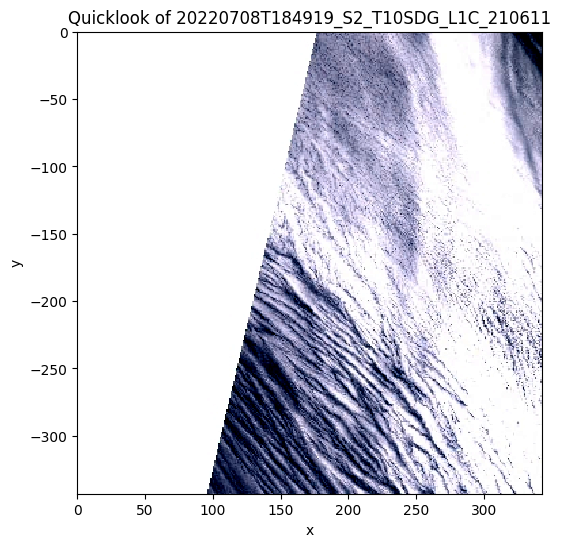

In [4]:
with tempenv.TemporaryEnvironment({
    "AWS_S3_ENDPOINT": "s3.eu-central-1.amazonaws.com",
    "AWS_SECRET_ACCESS_KEY": os.getenv("AWS_S3_AWS_SECRET_ACCESS_KEY"),
    "AWS_ACCESS_KEY_ID": os.getenv("AWS_S3_AWS_ACCESS_KEY_ID"),
}):
    with s3.temp_s3(requester_pays=True):
        path = r"s3://sentinel-s2-l1c/tiles/10/S/DG/2022/7/8/0"
        prod = Reader().open(path, constellation=Constellation.S2_SIN)
        prod.plot()

## Cloud data processed by USGS: Landsat-8

See this [registry](https://registry.opendata.aws/usgs-landsat/) (`arn:aws:s3:::usgs-landsat`).
This registry needs authentication.

<div class="alert alert-info">
  
   <strong>Note:</strong> USGS data are stored as requester pays in AWS. Don't forget to state this when requesting data!
    
</div>

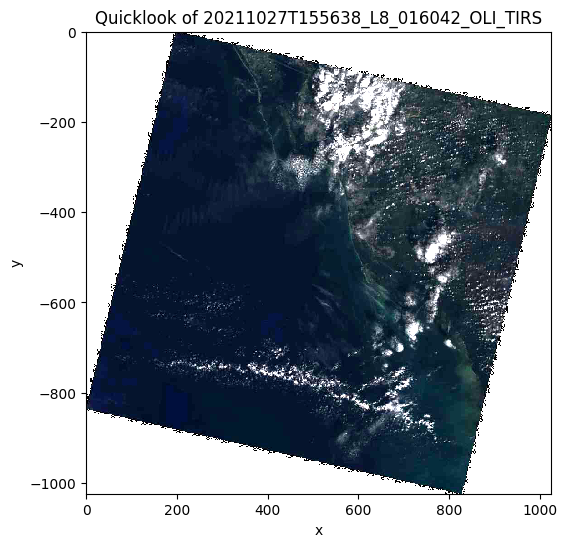

In [5]:
with tempenv.TemporaryEnvironment({
    "AWS_S3_ENDPOINT": "s3.us-west-2.amazonaws.com",
    "AWS_SECRET_ACCESS_KEY": os.getenv("AWS_S3_AWS_SECRET_ACCESS_KEY"),
    "AWS_ACCESS_KEY_ID": os.getenv("AWS_S3_AWS_ACCESS_KEY_ID"),
}):
    with s3.temp_s3(requester_pays=True):
        path = r"s3://usgs-landsat/collection02/level-1/standard/oli-tirs/2021/016/042/LC08_L1TP_016042_20211027_20211104_02_T1"
        prod = Reader().open(path)
        prod.plot(nodata=0)